# DAT301 Project 2 UCI Early Stage Diabetes Risk Prediction Dataset Analysis
**By Maxim Averbukh and Richard Teasdale**
### https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

<div>
<img src="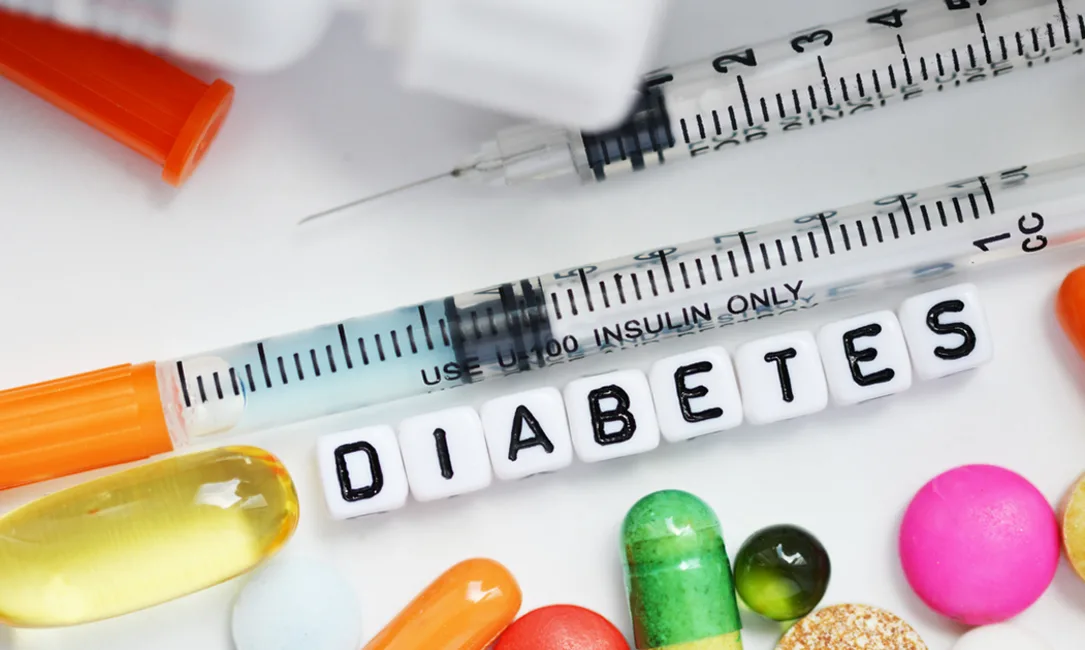
" width="500"/>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df=pd.read_csv('diabetes_data_upload.csv')
df


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## To make the data easier to work with we can convert yes/no answers into binary

In [3]:
dfnum=df.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [4]:
dfall=dfnum.replace(to_replace=['Negative', 'Positive'], value=[0, 1])

## Now lets play around and see what we have 

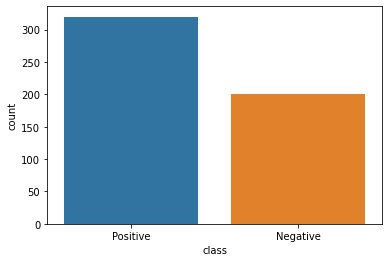

In [5]:
sns.countplot(df['class'])

The majority of cases are positive for diabetes, let's see exactly how many.

In [6]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

We can try to see what the realationship is between diabetes and age.

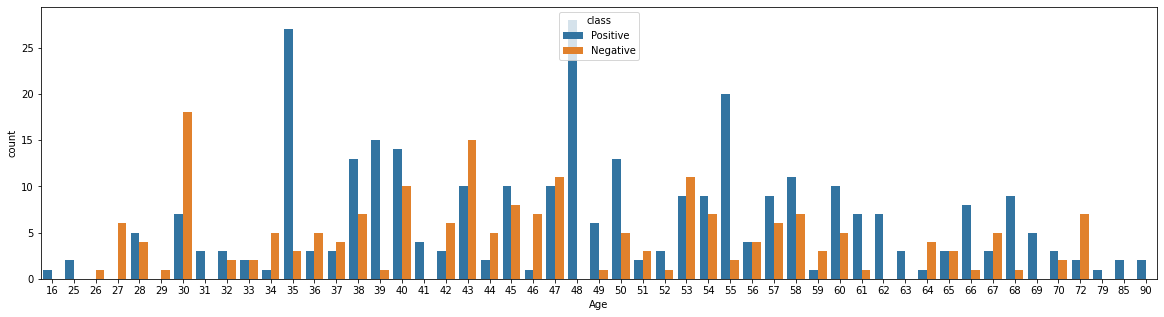

In [7]:
plt.figure(figsize=(20,5))
sns.countplot(df['Age'],hue=df['class'])

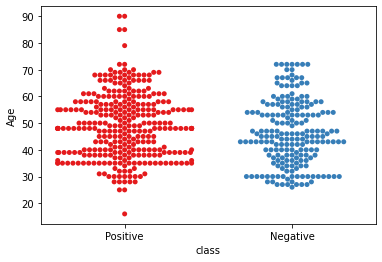

In [8]:

sns.swarmplot(df['class'], df['Age'], palette="Set1")

We see that positive cases are swarmed around the 30-70 agegroup. Is there a difference in diabetes rates between male and female patients?

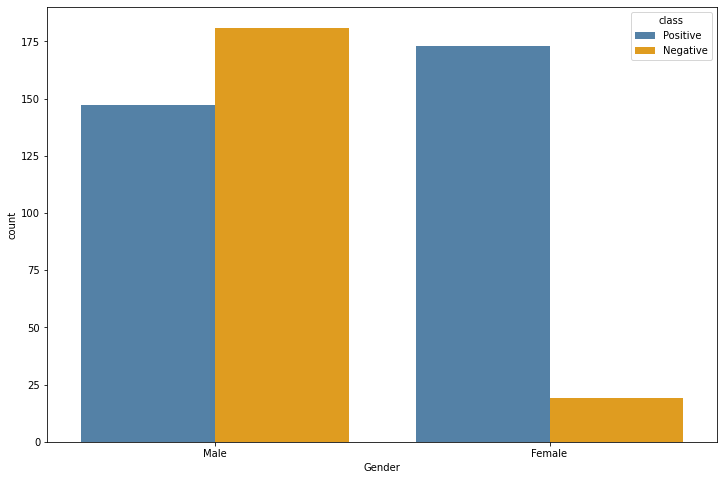

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="Gender", hue="class", palette=['STEELBLUE','orange'],data=df)

Looks like in this dataset woman are more often diabetic than men.

### Now let's find if there's any correlation betwen variables and present this correlation graphically 

In [10]:
dfall.corr() 

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Polyuria,0.199781,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384
Irritability,0.201625,0.237740,0.203446,0.140340,0.146698,0.239466,0.160551,0.077095,0.114006,1.000000,0.126877,0.151571,0.201637,0.043708,0.127801,0.299467


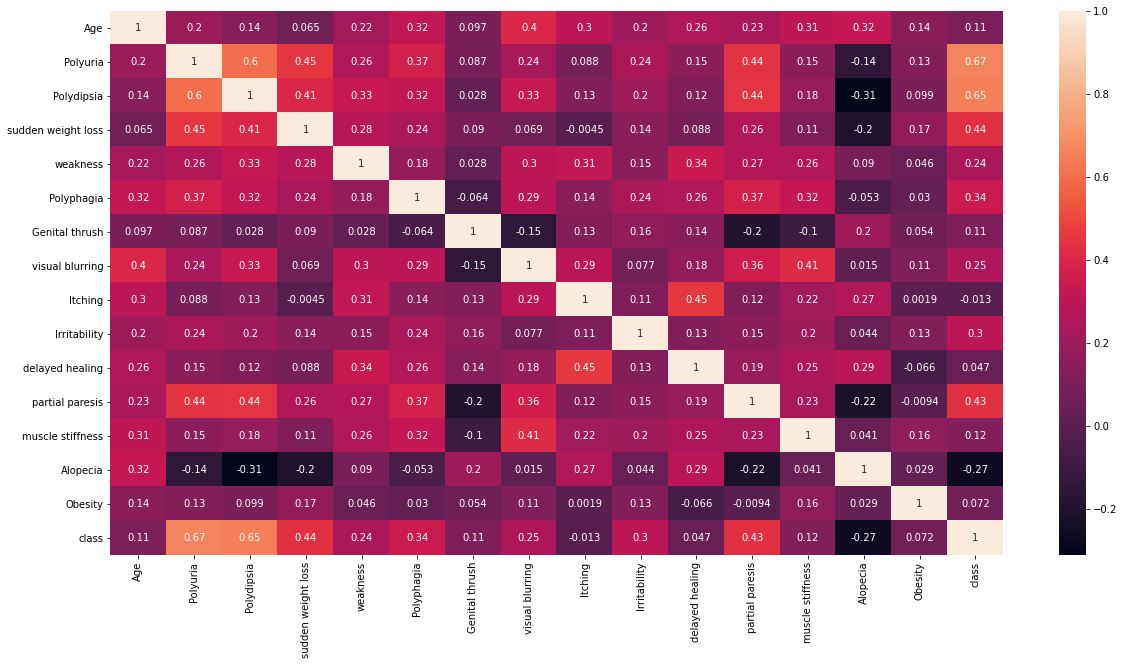

In [11]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dfall.corr(),annot=True)

Above we see that there's a strong correlation between diabetes and polyuria, and diabetes and	polydipsia. We can graph out below how many patients with each of the above symptoms have diabetes. 

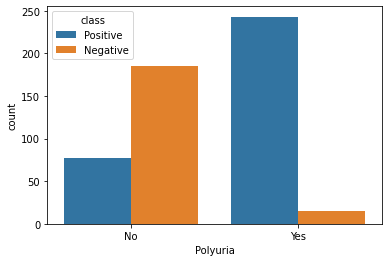

In [12]:
sns.countplot(df['Polyuria'],hue=df['class'])

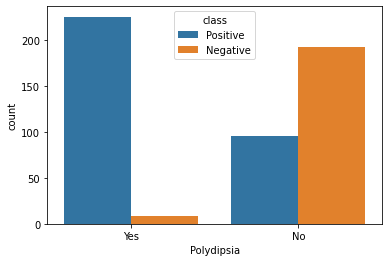

In [13]:
sns.countplot(df['Polydipsia'],hue=df['class'])

We see that a majority of patients with these symptoms have diebetes.

# There is also a strong correlation between Polyuria and Polydispia, so it would be interesting to see what patients with only one of these symptoms are like.

In [14]:
dipsia_no_uria_pos = sum(dfall[(dfall['Polyuria'] == 0) & (dfall['Polydipsia'] == 1)]['class'])
dipsia_no_uria_num = len(dfall[(dfall['Polyuria'] == 0) & (dfall['Polydipsia'] == 1)])
print(f'There are {dipsia_no_uria_num} people with Polydipsia and without Polyuria and of those, '
      f'{100*dipsia_no_uria_pos/dipsia_no_uria_num}% of them have diabetes.')


There are 40 people with Polydipsia and without Polyuria and of those, 80.0% of them have diabetes.


In [15]:
uria_no_dipsia_pos = sum(dfall[(dfall['Polydipsia'] == 0) & (dfall['Polyuria'] == 1)]['class'])
uria_no_dipsia_num = len(dfall[(dfall['Polydipsia'] == 0) & (dfall['Polyuria'] == 1)])

print(f'There are {uria_no_dipsia_num} people with Polyuria and without Polydipsia and of those, '
      f'{(100* uria_no_dipsia_pos/uria_no_dipsia_num).__round__(2)}% of them have diabetes.')


There are 65 people with Polyuria and without Polydipsia and of those, 76.92% of them have diabetes.


### It seems that either of those symptoms are cause for concern, even when in isolation.


In [16]:
uria_and_dipsia_pos = sum(dfall[(dfall['Polydipsia'] == 1) & (dfall['Polyuria'] == 1)]['class'])
uria_and_dipsia_num = len(dfall[(dfall['Polydipsia'] == 1) & (dfall['Polyuria'] == 1)])

print(f'There are {uria_and_dipsia_num} people with Polyuria and Polydipsia and of those, '
      f'{(100* uria_and_dipsia_pos/uria_and_dipsia_num).__round__(2)}% of them have diabetes.')


There are 193 people with Polyuria and Polydipsia and of those, 100.0% of them have diabetes.


## And it seems that these symptoms combined practically guarantee a diabetes diagnosis, as seen above.

### We can also look at the number of people with each symptom in general:



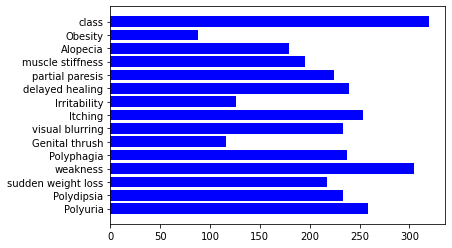

In [17]:
xpos = [i for i, _ in enumerate(dfall.drop(columns=['Age', 'Gender']).columns)]

plt.barh(xpos, (dfall.drop(columns=['Age', 'Gender'])).sum(axis=0 ), color = 'blue')
plt.yticks(xpos, dfall.drop(columns=['Age', 'Gender']).columns)
plt.show()

## Let's compare the number of people with each sympton with and without Diabetes.


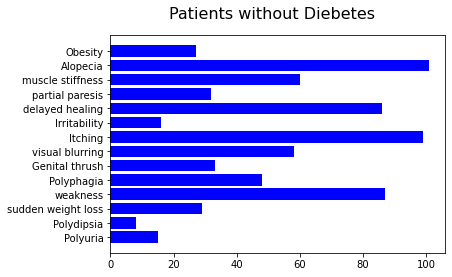

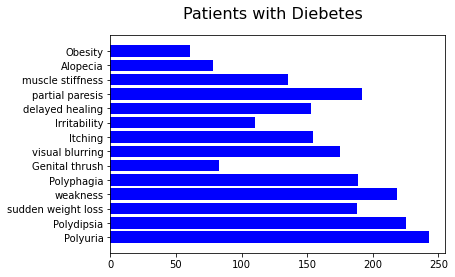

In [18]:
xpos = [i for i, _ in enumerate(dfall.drop(columns=['Age', 'Gender', 'class']).columns)]

plt.suptitle('Patients without Diebetes', fontsize=16)

plt.barh(xpos, (dfall[dfall['class'] == 0].drop(columns=['Age', 'Gender', 'class'])).sum(axis=0 ), color = 'blue')
plt.yticks(xpos, dfall.drop(columns=['Age', 'Gender', 'class']).columns)
plt.show()

plt.suptitle('Patients with Diebetes', fontsize=16)

plt.barh(xpos, (dfall[dfall['class'] == 1].drop(columns=['Age', 'Gender', 'class'])).sum(axis=0 ), color = 'blue')
plt.yticks(xpos, dfall.drop(columns=['Age', 'Gender', 'class']).columns)
plt.show()

# With this data in mind we can use ML to predict whether a patient has diabetes based on age, gender, and symptoms.

In [19]:
dfall=dfnum.replace(to_replace=['Female', 'Male'], value=[1, 0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfall.drop('class', axis=1),dfall['class'], test_size=0.3, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [22]:
def predict_note_authentication(age,gender,polyuria,polydipsia,weight,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability, delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity):

    prediction=RF_classifier.predict(sc.transform(np.array([[int(age),int(gender),int(polyuria),int(polydipsia),int(weight),int(weakness),int(polyphagia),int(genital_thrush),int(visual_blurring),int(itching),int(irritability), int(delayed_healing),int(partial_paresis),int(muscle_stiffness),int(alopecia),int(obesity)]])))
    print(prediction)
    return prediction

## The code below will ask you a series of questions to predict whether you might have diabetes. Answer all questions, besides your age and sex, as Yes or No. This code is for educational purposes only and should not be used for medical purposes

In [23]:
print('How old are you?')
age = input()

print('Are you Male or Female:')
gender = input()
if gender == 'Male':
    gender = 0
else:
    gender = 1

print('Do you have Polyuria?')
polyuria = input()
if polyuria == 'Yes':
    polyuria = 1
else:
    polyuria = 0

       
print('Do you have Polydipsia?')
polydipsia = input()
if polydipsia == 'Yes':
    polydipsia = 1
else:
    polydipsia = 0
    
print('Recently have you observed sudden weight loss?')
weight = input()
if weight == 'Yes':
    weight = 1
else:
    weight = 0

print('Have you been feeling weekness?')
weakness = input()
if weakness == 'Yes':
    weakness = 1
else:
    weakness = 0

print('Do you have Polyphagia?')
polyphagia = input()
if polyphagia == 'Yes':
    polyphagia = 1
else:
    polyphagia = 0

        
print('Do you have Genital thrush?')
genital_thrush = input()
if genital_thrush == 'Yes':
    genital_thrush = 1
else:
    genital_thrush = 0


print('Do you experience Visual blurring?')
visual_blurring = input()
if visual_blurring == 'Yes':
    visual_blurring = 1
else:
    visual_blurring = 0


print('Do you experience Itching?')
itching = input()
if itching == 'Yes':
    itching = 1
else:
    itching = 0
 

print('Do you experience Irritability?')
irritability = input()
if irritability == 'Yes':
    irritability = 1
else:
    irritability = 0


print('Do you experience Delayed healing?')
delayed_healing = input()
if delayed_healing == 'Yes':
    delayed_healing = 1
else:
    delayed_healing = 0

print('Do you experience Partial paresis?')
partial_paresis = input()
if partial_paresis == 'Yes':
    partial_paresis = 1
else:
    partial_paresis = 0

print('Do you experience Muscle stiffness?')
muscle_stiffness = input()
if muscle_stiffness == 'Yes':
    muscle_stiffness = 1
else:
    muscle_stiffness = 0

print('Do you experience Alopecia?')
alopecia = input()
if alopecia == 'Yes':
    alopecia = 1
else:
    alopecia = 0


print('Are you overweight?')
obesity = input()
if obesity == 'Yes':
    obesity = 1
else:
    obesity = 0





How old are you?
21
Are you Male or Female:
Male
Do you have Polyuria?
No
Do you have Polydipsia?
No
Recently have you observed sudden weight loss?
No
Have you been feeling weekness?
No
Do you have Polyphagia?
No
Do you have Genital thrush?
No
Do you experience Visual blurring?
No
Do you experience Itching?
No
Do you experience Irritability?
No
Do you experience Delayed healing?
No
Do you experience Partial paresis?
No
Do you experience Muscle stiffness?
No
Do you experience Alopecia?
No
Are you overweight?
No


## If you run the cell below, the output will either say that you are Positive or Negative for Diabetes.

In [25]:

predict_note_authentication(age,gender,polyuria,polydipsia,weight,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability, delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity)

['Negative']


array(['Negative'], dtype=object)